# Wildfires Modelling in the US - Exploratory Data Analysis

### Import data and load libraries

In [1]:
setwd("~/GitHub/MRM_mini_project")
source('data_import.R')

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(ggplot2)
library(purrr)
library(tidyr)
library(plotly)
library(png)
library(gifski)
library(gganimate)
library(cowplot)
library(ggcorrplot)
library(reshape2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'plotly' was built under R version 3.6.3"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Warning message:
"package 'gifski' was built under R version 3.6.3"Warning message:
"package 'gganimate' was built under R version 3.6.3"Warning message:
"package 'cowplot' was built under R version 3.6.3"Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [3]:
names = c('Cropland',
          'Vegetation/bare land',
          'Tree broadleaved evergreen',
          'Tree broadleaved deciduous',
          'Tree needleleave evergreen',
          'Tree needleleave deciduous',
          'Tree mixed',
          'Grass',
          'Shrubs and shrubs mixed with trees',
          'Urban',
          'Water and flooded areas')

df_grouped <- group.lc(df, TRUE)

data_train_DF_grouped <- group.lc(data_train_DF, TRUE)

In [4]:
head(data_train_DF)
head(data_train_DF_grouped)

CNT,lon,lat,area,year,month,lc1,lc2,lc3,lc4,...,dew_temperature,temperature,potential_evaporation,solar_radiation,thermal_radiation,pressure,evaporation,precipitation,humidity,Wspeed
0,-95.25,49.25,0.24,1993,3,5.913791e-06,1.585707e-02,2.316789e-05,0.0012990981,...,265.4577,268.8671,-0.005898168,9187450,-5231371,97849.91,-0.0003403090,0.0004477672,76.30498,0.2777650
0,-94.75,49.25,0.39,1993,3,5.032750e-06,2.748562e-03,2.187263e-06,0.0002335513,...,265.5218,268.4124,-0.001130986,6993830,-4851900,97954.70,-0.0002643108,0.0004616571,79.47984,0.2325486
0,-122.75,48.75,0.48,1993,3,2.420348e-03,1.039636e-01,3.869906e-03,0.0270985159,...,276.6998,280.5947,-0.010519473,10525660,-4860741,100808.47,-0.0019450733,0.0045446772,75.57672,1.2810724
3,-122.25,48.75,1.00,1993,3,2.987710e-03,2.374416e-01,4.039879e-03,0.0473821529,...,274.9433,278.5744,-0.008420324,9359787,-4653412,98474.65,-0.0012562150,0.0061737616,76.70380,0.9639195
0,-121.75,48.75,1.00,1993,3,0.000000e+00,4.781806e-03,1.955618e-04,0.0127774222,...,271.2353,274.5781,-0.005976053,7479946,-3889239,91660.62,-0.0005024057,0.0081101023,77.70337,0.5407315
0,-121.25,48.75,1.00,1993,3,0.000000e+00,6.928401e-05,0.000000e+00,0.0019178739,...,269.8717,273.2410,-0.006700438,7876510,-4295319,87976.47,-0.0003777982,0.0063742823,77.31819,0.3879719


CNT,lon,lat,year,month,altiMean,altiSD,dew_temperature,temperature,potential_evaporation,...,lc_Vegetation_Bare_areas,lc_Tree_broadleaved_evergreen,lc_Tree_broadleaved_deciduous,lc_Tree_needleleave_evergreen,lc_Tree_needleleave_deciduous,lc_Tree_mixed,lc_Grassland,lc_Shrubs,lc_Urban,lc_Water_and_flooded_areas
0,-95.25,49.25,1993,3,326.26404,7.642085,265.4577,268.8671,-0.005898168,...,0.0039517236,0.0075776941,0.0224657358,0.02134126,0.0491346429,0.02398679,0.0005464001,0.017008274,4.981056e-06,0.08989751
0,-94.75,49.25,1993,3,320.49634,3.380354,265.5218,268.4124,-0.001130986,...,0.0001695118,0.0023700531,0.0212909850,0.01528444,0.0418598894,0.07277245,0.0000207651,0.003211678,9.343564e-06,0.23175098
0,-122.75,48.75,1993,3,67.72624,90.724846,276.6998,280.5947,-0.010519473,...,0.0133749998,0.0085480170,0.0000000000,0.06386684,0.0000119658,0.02017716,0.0002376832,0.003873978,4.717954e-03,0.31124849
3,-122.25,48.75,1993,3,317.39478,327.259521,274.9433,278.5744,-0.008420324,...,0.0538375072,0.0360138750,0.0001966062,0.23470242,0.0337003306,0.25456208,0.0029306872,0.022710824,1.947040e-02,0.08594539
0,-121.75,48.75,1993,3,1022.89081,506.424316,271.2353,274.5781,-0.005976053,...,0.0614042193,0.0019219993,0.0028495776,0.30649467,0.3902305459,0.08981667,0.0181790382,0.065315550,1.180810e-04,0.02271261
0,-121.25,48.75,1993,3,1209.37671,500.343719,269.8717,273.2410,-0.006700438,...,0.1131144016,0.0001388274,0.0078848109,0.18286164,0.4501503152,0.03314574,0.0613115614,0.097574929,0.000000e+00,0.01890089


In [5]:
summary(data_train_DF)

      CNT              lon               lat             area       
 Min.   :  0.00   Min.   :-124.75   Min.   :25.25   Min.   :0.0100  
 1st Qu.:  0.00   1st Qu.:-110.25   1st Qu.:35.25   1st Qu.:1.0000  
 Median :  0.00   Median : -98.75   Median :39.75   Median :1.0000  
 Mean   :  2.29   Mean   : -98.75   Mean   :39.42   Mean   :0.9584  
 3rd Qu.:  2.00   3rd Qu.: -87.75   3rd Qu.:43.75   3rd Qu.:1.0000  
 Max.   :359.00   Max.   : -66.75   Max.   :49.25   Max.   :1.0000  
 NA's   :80000                                                      
      year          month        lc1                lc2          
 Min.   :1993   Min.   :3   Min.   :0.000000   Min.   :0.000000  
 1st Qu.:1998   1st Qu.:4   1st Qu.:0.001145   1st Qu.:0.003521  
 Median :2004   Median :6   Median :0.003880   Median :0.032741  
 Mean   :2004   Mean   :6   Mean   :0.011065   Mean   :0.171830  
 3rd Qu.:2010   3rd Qu.:8   3rd Qu.:0.009456   3rd Qu.:0.238491  
 Max.   :2015   Max.   :9   Max.   :0.375097   Max. 

Boxplots of variables

No id variables; using all as measure variables
Warning message:
"Removed 80000 rows containing non-finite values (stat_boxplot)."

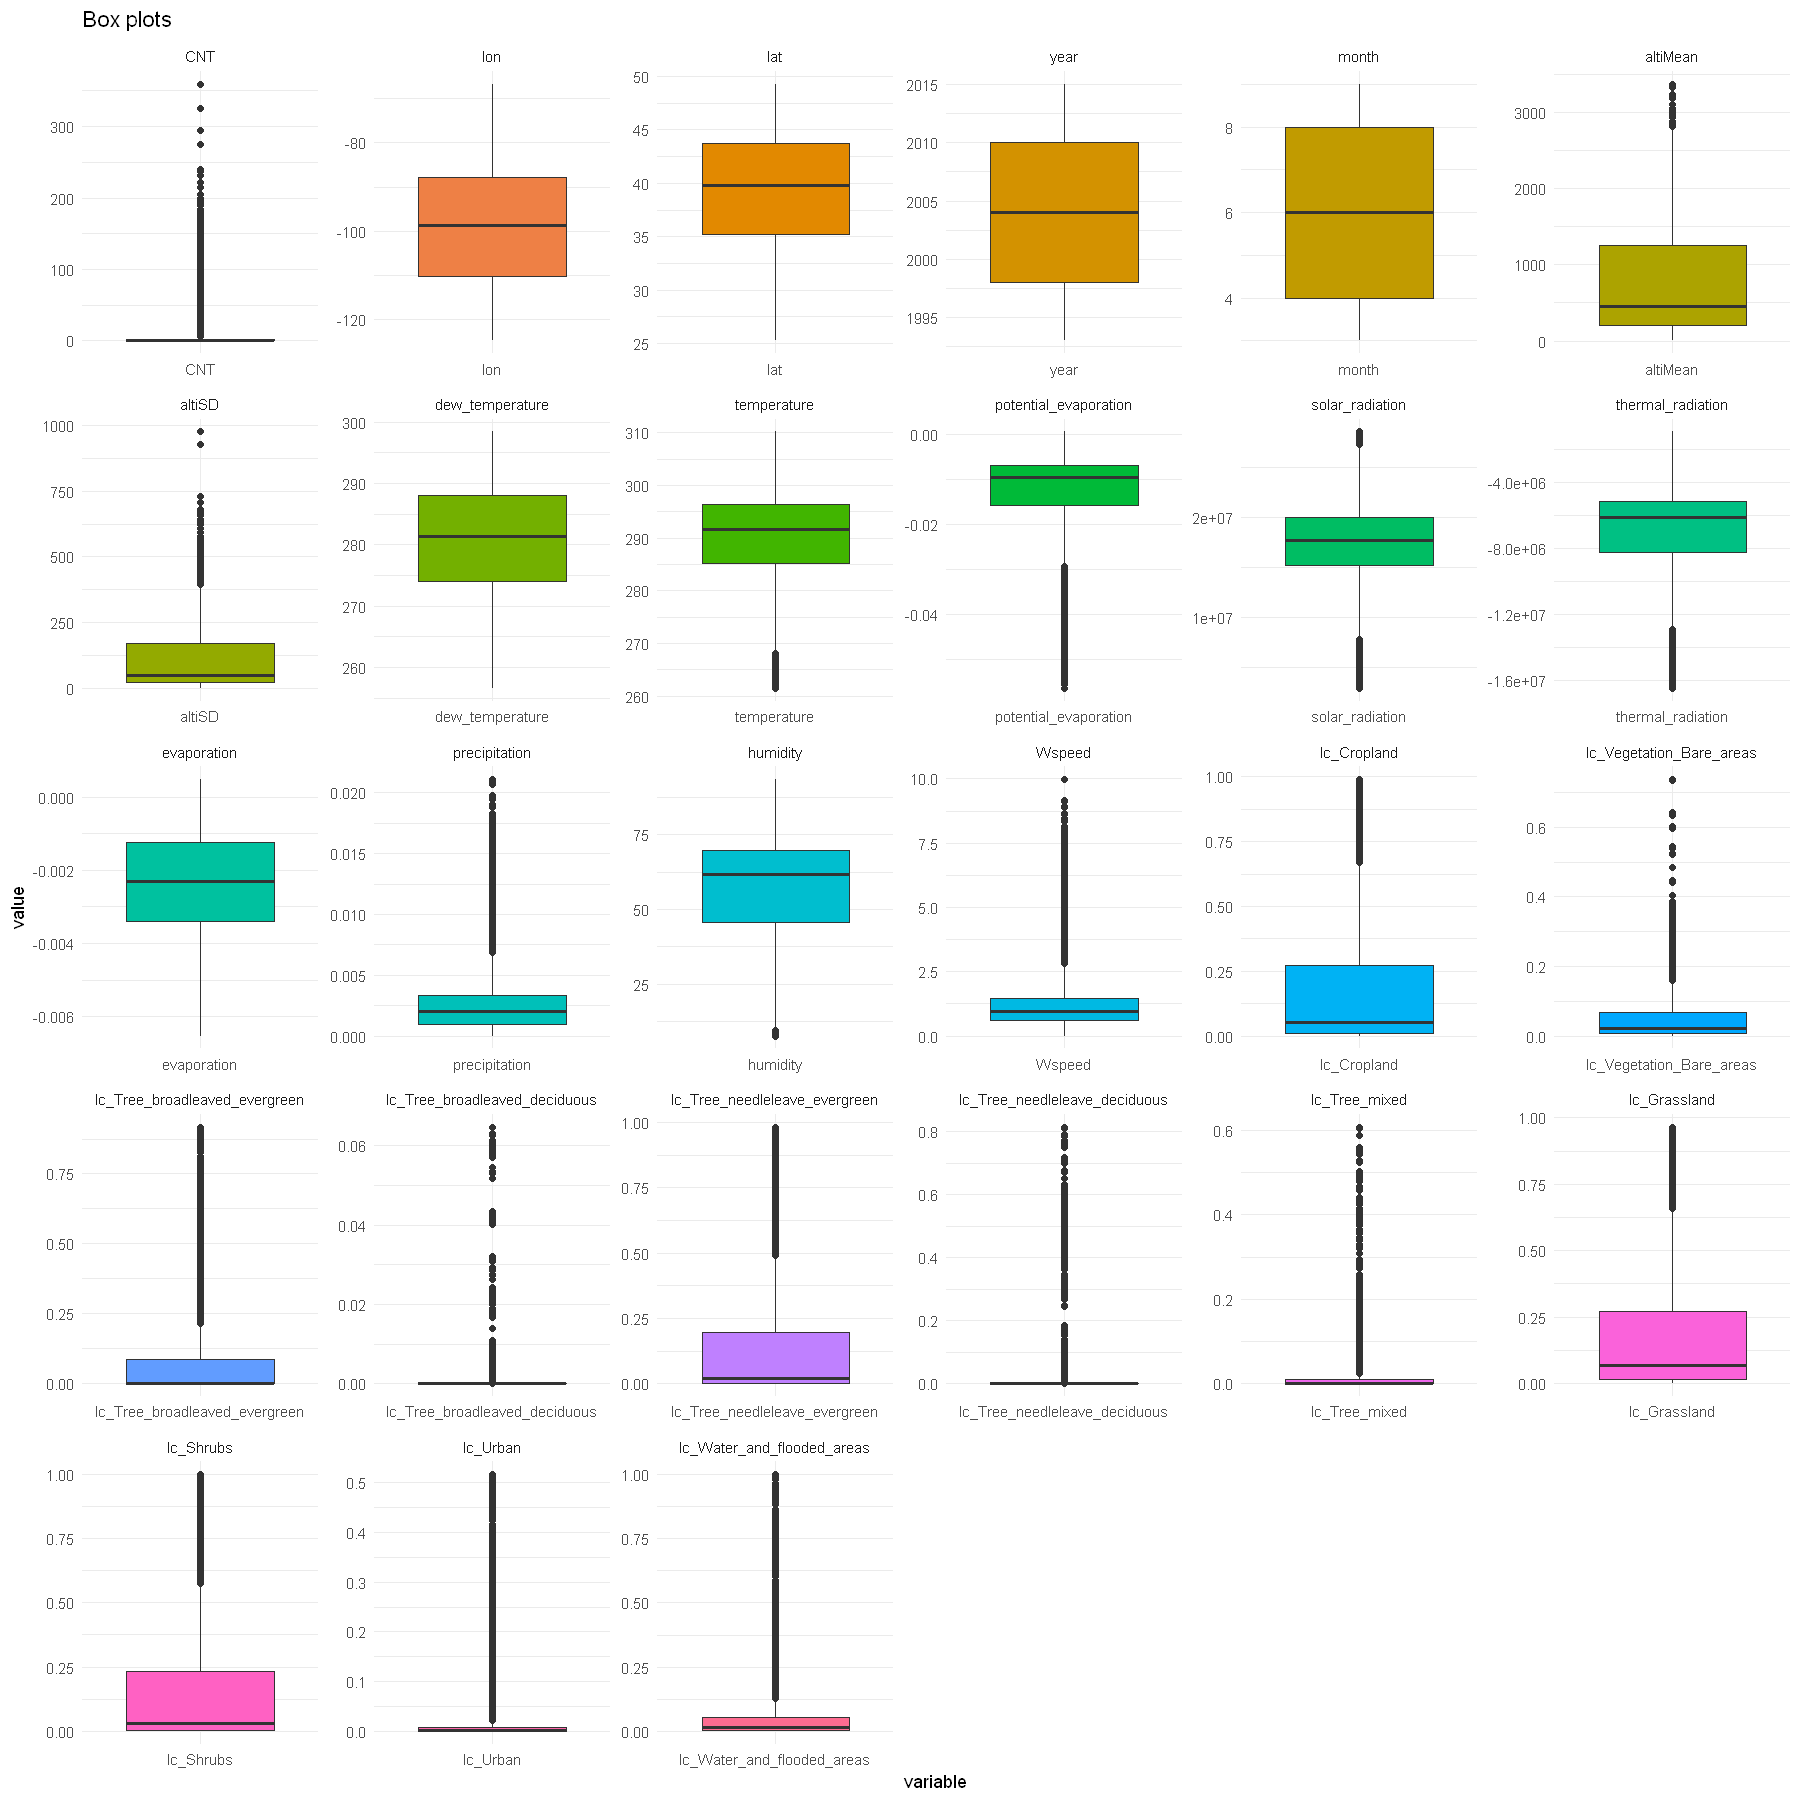

In [6]:
p <- ggplot(data = melt(data_train_DF_grouped), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable)) + theme_minimal() + 
  theme(legend.position = "none") + ggtitle("Box plots") + 
  facet_wrap( ~ variable, scales="free")
options(repr.plot.width=15, repr.plot.height=15)
p

## Spatial plots

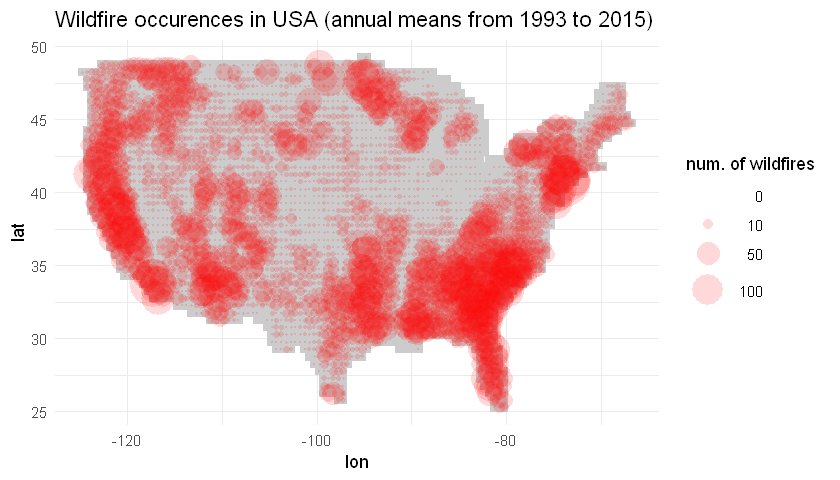

In [7]:
p <- (data_train_DF %>% 
    select(c(CNT, month, year, lat, lon)) %>%
    group_by(.dots=c("lat", "lon", "year")) %>% 
    mutate(CNTy=sum(CNT, na.rm=1))) %>%
    group_by(.dots=c("lat", "lon")) %>% 
    mutate(CNTyMean=mean(CNTy)) %>% 
    arrange(desc(CNTyMean)) %>% 
    distinct(lat, lon, CNTyMean) %>% 
  ggplot(aes(x=lon, y=lat)) +
  geom_point(shape=15, size=2.1, colour="gray80") + 
  geom_point(aes(size = CNTyMean), alpha=0.15, color="red", stroke = 0, shape = 16) +
  scale_size(breaks = c(0, 10, 50, 100), 
             range = c(0, 15), 
             name="num. of wildfires", 
             labels = expression(0, 10, 50, 100)) + 
  theme_minimal() + 
  ggtitle('Wildfire occurences in USA (annual means from 1993 to 2015)')
options(repr.plot.width=7, repr.plot.height=4)
p

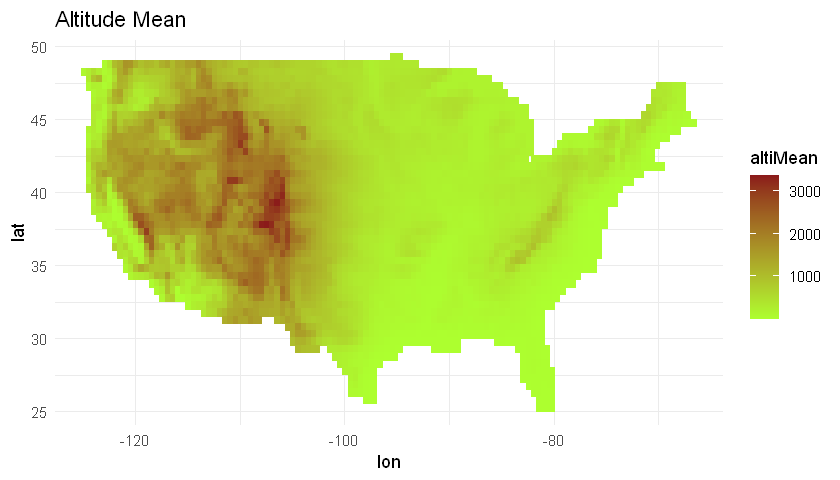

In [8]:
df %>% filter(year==2015, month==3) %>% ggplot(aes(x=lon, y=lat)) +
  geom_point(aes(colour = altiMean), shape=15, size=2.1) +
  theme_minimal() + 
  ggtitle('Altitude Mean') +
  scale_colour_gradient(low = "greenyellow", high = "firebrick4")

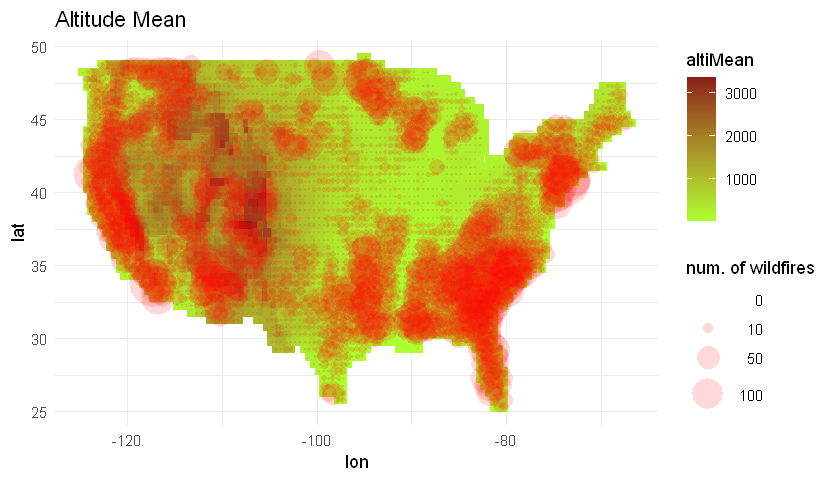

In [9]:
(data_train_DF %>% 
    select(c(CNT, month, year, lat, lon, altiMean)) %>%
    group_by(.dots=c("lat", "lon", "year")) %>% 
    mutate(CNTy=sum(CNT, na.rm=1))) %>%
    group_by(.dots=c("lat", "lon")) %>% mutate(CNTyMean=mean(CNTy)) %>% 
    arrange(desc(CNTyMean)) %>% distinct(lat, lon, CNTyMean, altiMean) %>%
  ggplot(aes(x=lon, y=lat)) +
  geom_point(aes(colour = altiMean), shape=15, size=2.1) +
  theme_minimal() + 
  ggtitle('Altitude Mean') +
  scale_colour_gradient(low = "greenyellow", high = "firebrick4") +
  geom_point(aes(size = CNTyMean), alpha=0.15, color="red", stroke = 0, shape = 16) +
  scale_size(breaks = c(0, 10, 50, 100), 
             range = c(0, 15), 
             name="num. of wildfires", 
             labels = expression(0, 10, 50, 100))

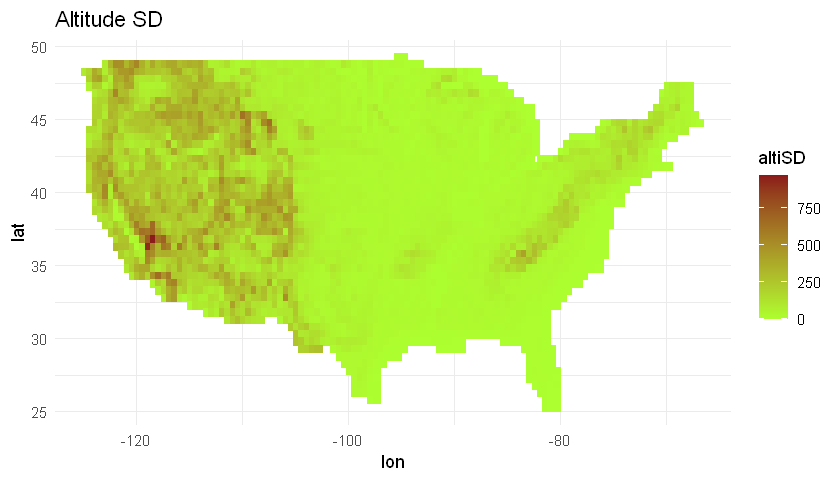

In [10]:
df %>% filter(year==2015) %>% ggplot(aes(x=lon, y=lat)) +
  geom_point(aes(colour = altiSD), shape=15, size=2.1) +
  theme_minimal() + 
  ggtitle('Altitude SD') +
  scale_colour_gradient(low = "greenyellow", high = "firebrick4")

Visualize the major land cover (take the argmax by the location)

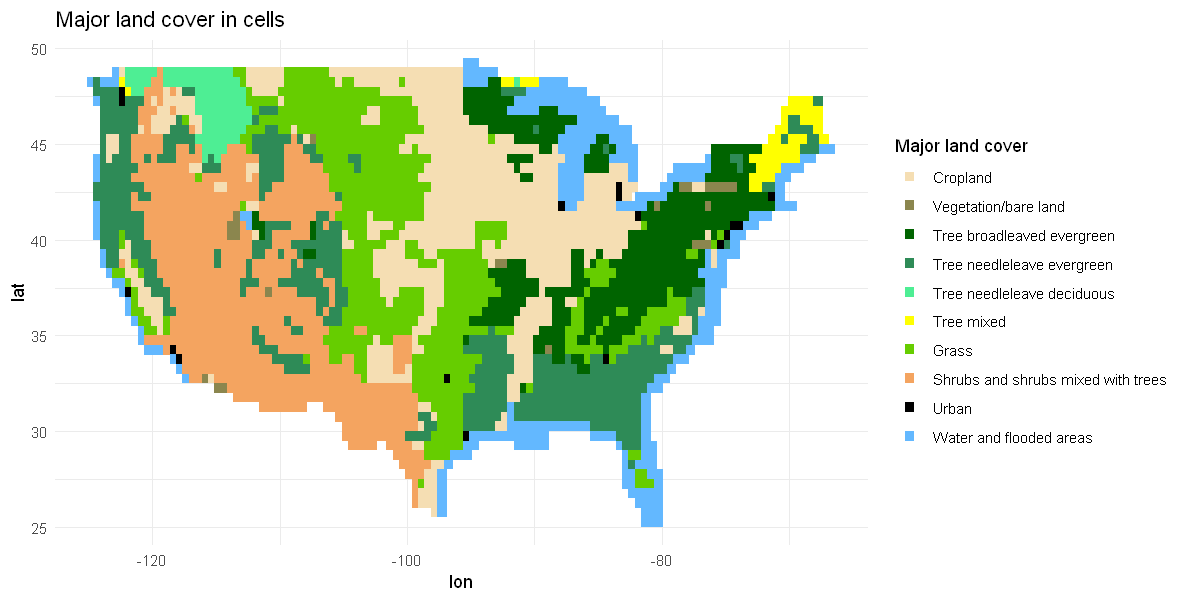

In [11]:
p <- df_grouped %>% 
  mutate(`Major land cover`=factor(max.col(df_grouped %>% select(starts_with("lc"))), labels = names[1:11 %in% max.col(df_grouped %>% select(starts_with("lc")))])) %>% 
  filter(year==2015) %>% ggplot(aes(x=lon, y=lat, colour = `Major land cover`)) +
  geom_point(shape=15, size=2.4) +
  theme_minimal() + 
  ggtitle('Major land cover in cells') + 
  scale_color_manual(values = c("wheat", "khaki4", "darkgreen", "seagreen4", "seagreen2", "yellow", "chartreuse3", "sandybrown", "black", "steelblue1"))
options(repr.plot.width=10, repr.plot.height=5)
p

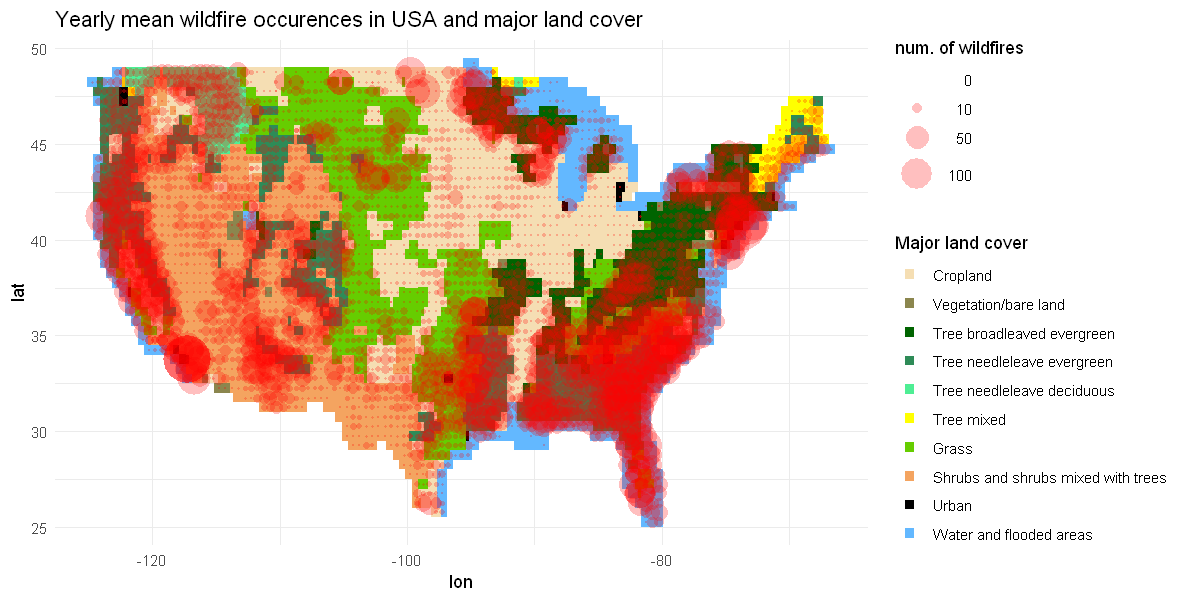

In [12]:
p <- (data_train_DF_grouped %>% 
  mutate(`Major land cover`=factor(max.col(data_train_DF_grouped %>% select(starts_with("lc"))), 
                                   labels = names[1:11 %in% max.col(data_train_DF_grouped %>% select(starts_with("lc")))])) %>%
  select(c(CNT, month, year, lat, lon, `Major land cover`)) %>%
  group_by(.dots=c("lat", "lon", "year")) %>% 
  mutate(CNTy=sum(CNT, na.rm=1))) %>%
  group_by(.dots=c("lat", "lon")) %>% mutate(CNTyMean=mean(CNTy)) %>% 
  arrange(desc(CNTyMean)) %>% distinct(lat, lon, CNTyMean, `Major land cover`) %>%
  
  ggplot(aes(x=lon, y=lat, colour = `Major land cover`)) +
  geom_point(shape=15, size=2.4) +
  scale_color_manual(values = c("wheat", "khaki4", "darkgreen", "seagreen4", "seagreen2", "yellow", "chartreuse3", "sandybrown", "black", "steelblue1")) + 
  
  geom_point(aes(size = CNTyMean), alpha=0.25, color="red", stroke = 0, shape = 16) +
  scale_size(breaks = c(0, 10, 50, 100), 
             range = c(0, 15), 
             name="num. of wildfires", 
             labels = expression(0, 10, 50, 100)) + 
  theme_minimal() + 
  ggtitle('Yearly mean wildfire occurences in USA and major land cover')
p

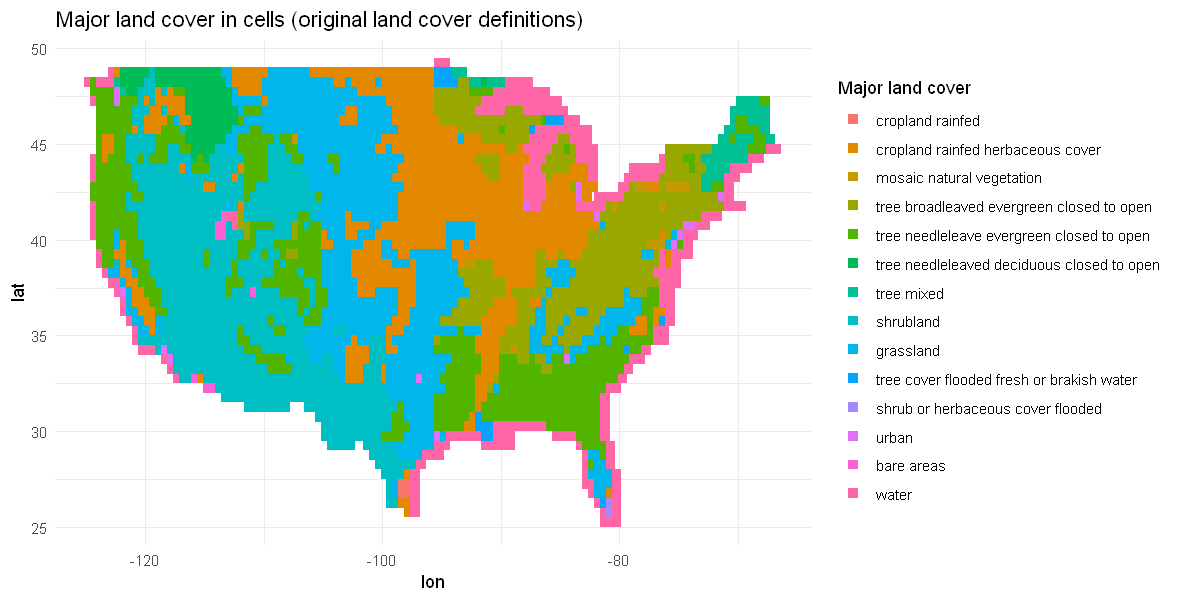

In [13]:
names_all <- c('cropland rainfed',
  'cropland rainfed herbaceous cover',
  'mosaic cropland',
  'mosaic natural vegetation',
  'tree broadleaved evergreen closed to open',
  'tree broadleaved deciduous closed to open',
  'tree needleleave evergreen closed to open',
  'tree needleleaved deciduous closed to open',
  'tree mixed',
  'mosaic tree and shrub',
  'shrubland',
  'grassland',
  'sparse vegetation',
  'tree cover flooded fresh or brakish water',
  'shrub or herbaceous cover flooded',
  'urban',
  'bare areas',
  'water')

df %>% 
  mutate(`Major land cover`=factor(max.col(df %>% select(starts_with("lc"))), labels = names_all[1:18 %in% max.col(df %>% select(starts_with("lc")))])) %>% 
  filter(year==2015) %>% 
  ggplot(aes(x=lon, y=lat, colour = `Major land cover`)) +
    geom_point(shape = 15, size=2.4) +
    theme_minimal() + 
    ggtitle('Major land cover in cells (original land cover definitions)')

Correlation plot (original data)

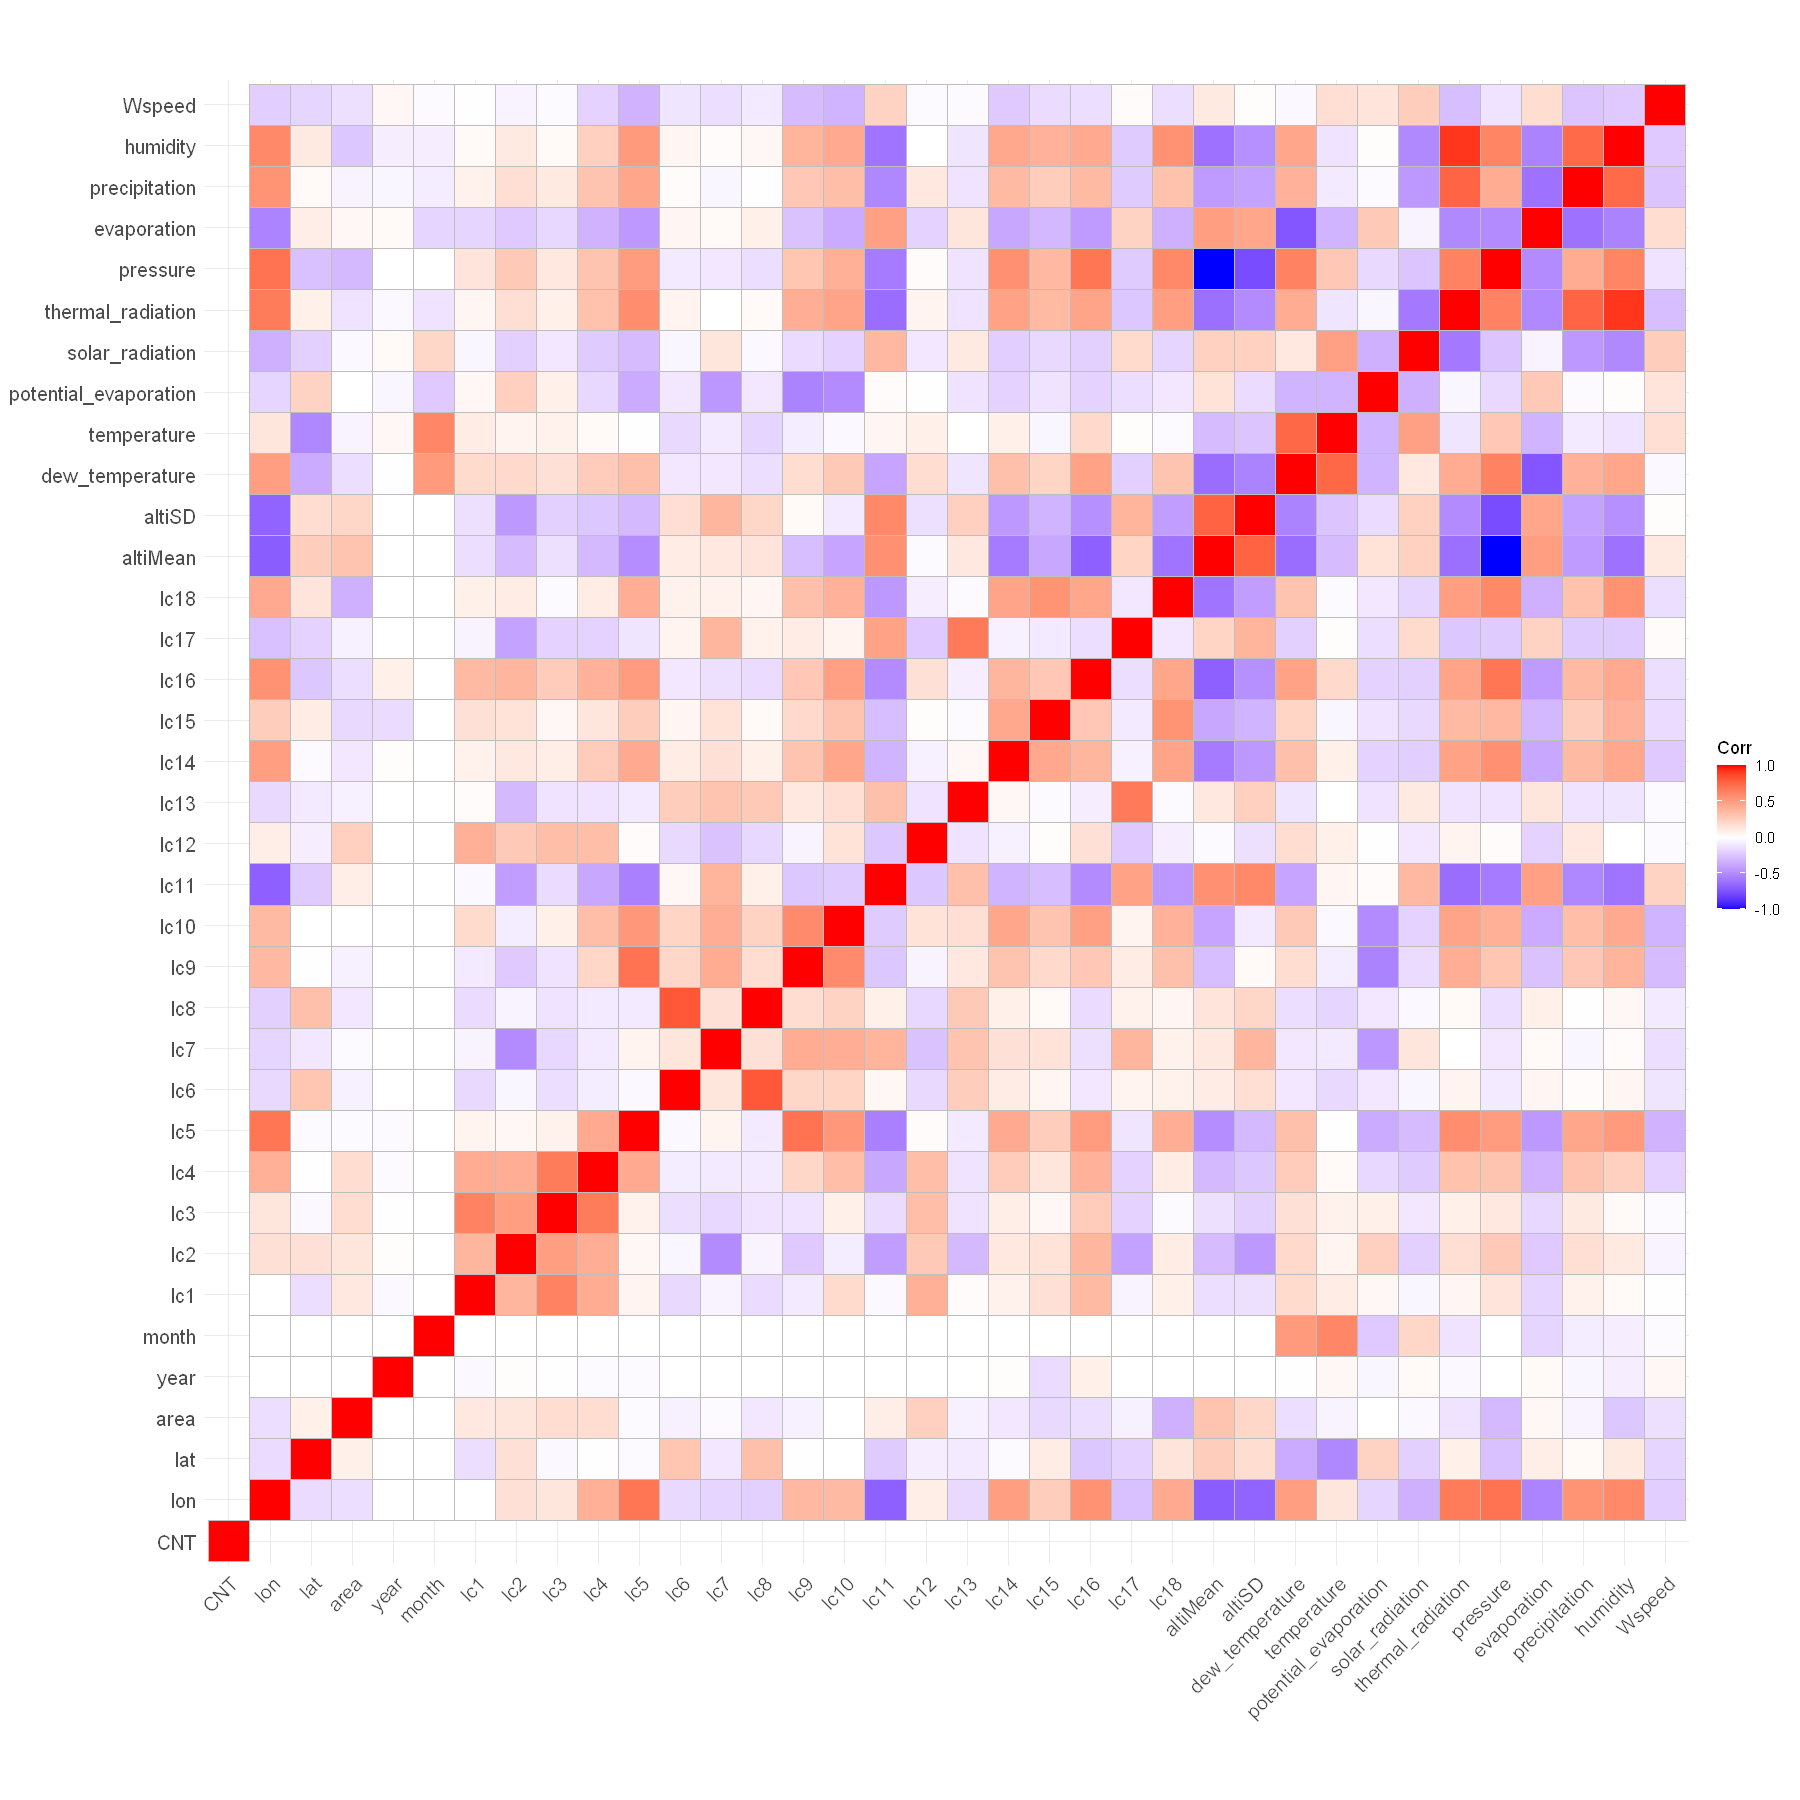

In [19]:
corr <- corr <- round(cor(data_train_DF, method = "spearman"), 2)
ggcorrplot(corr, method="square")

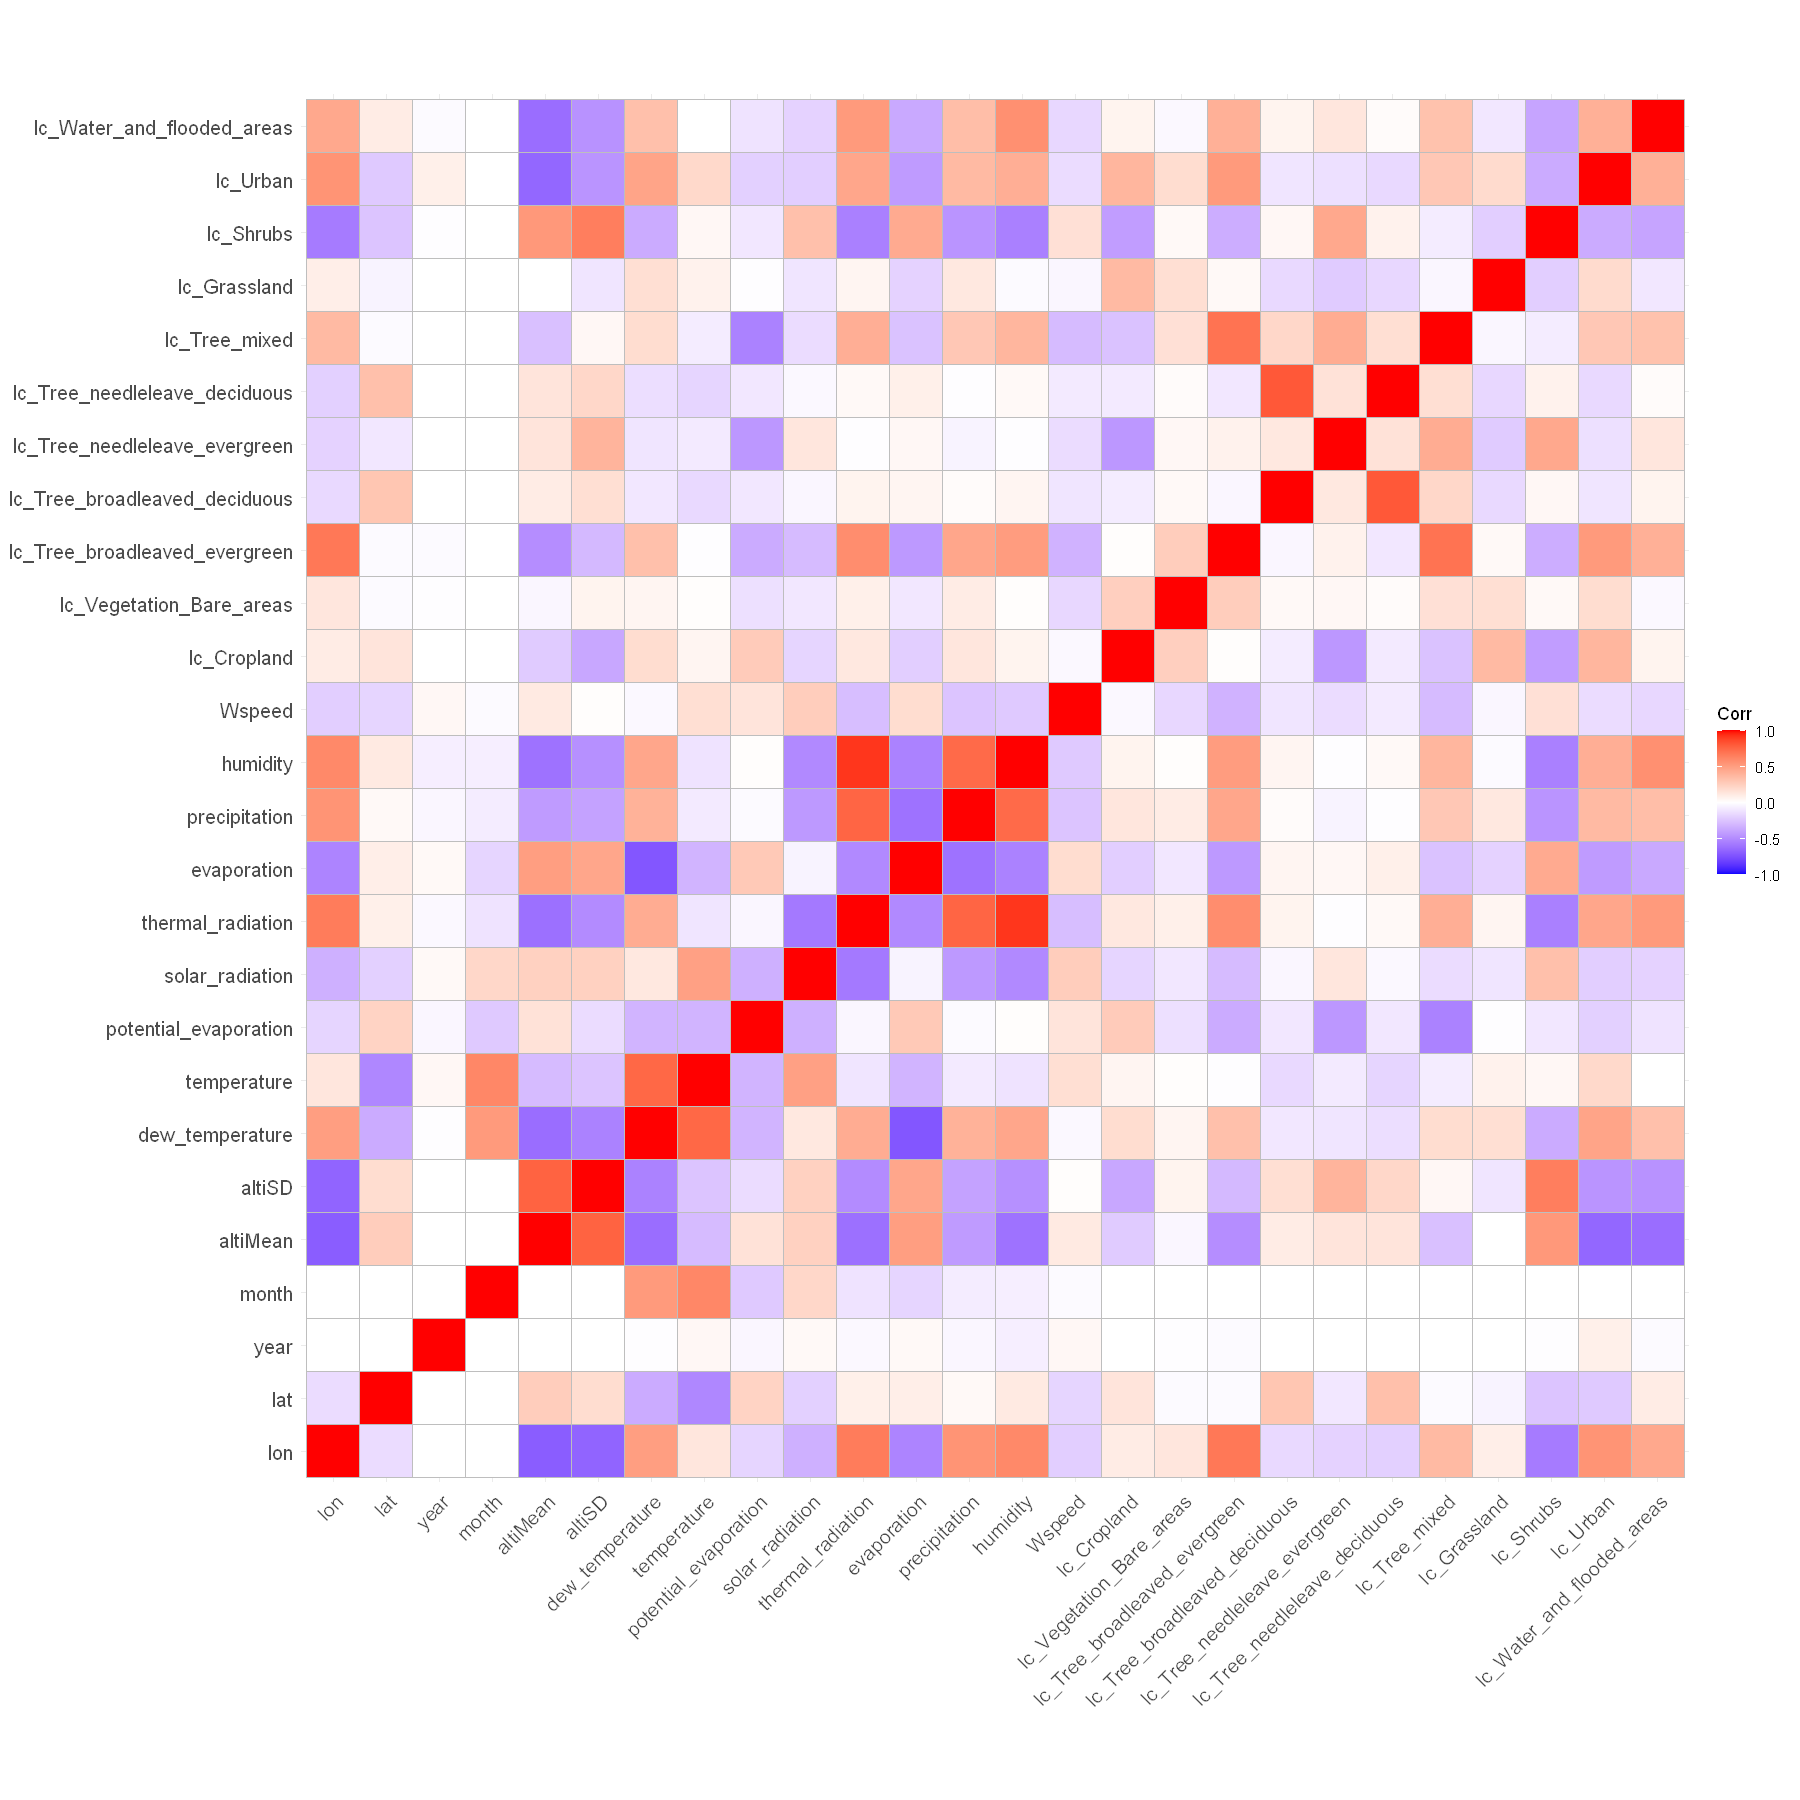

In [22]:
corr <- corr <- round(cor(data_train_DF_grouped[,-1], method = "spearman"), 2)
ggcorrplot(corr, method="square")

Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 80000 rows containing non-finite values (stat_bin)."

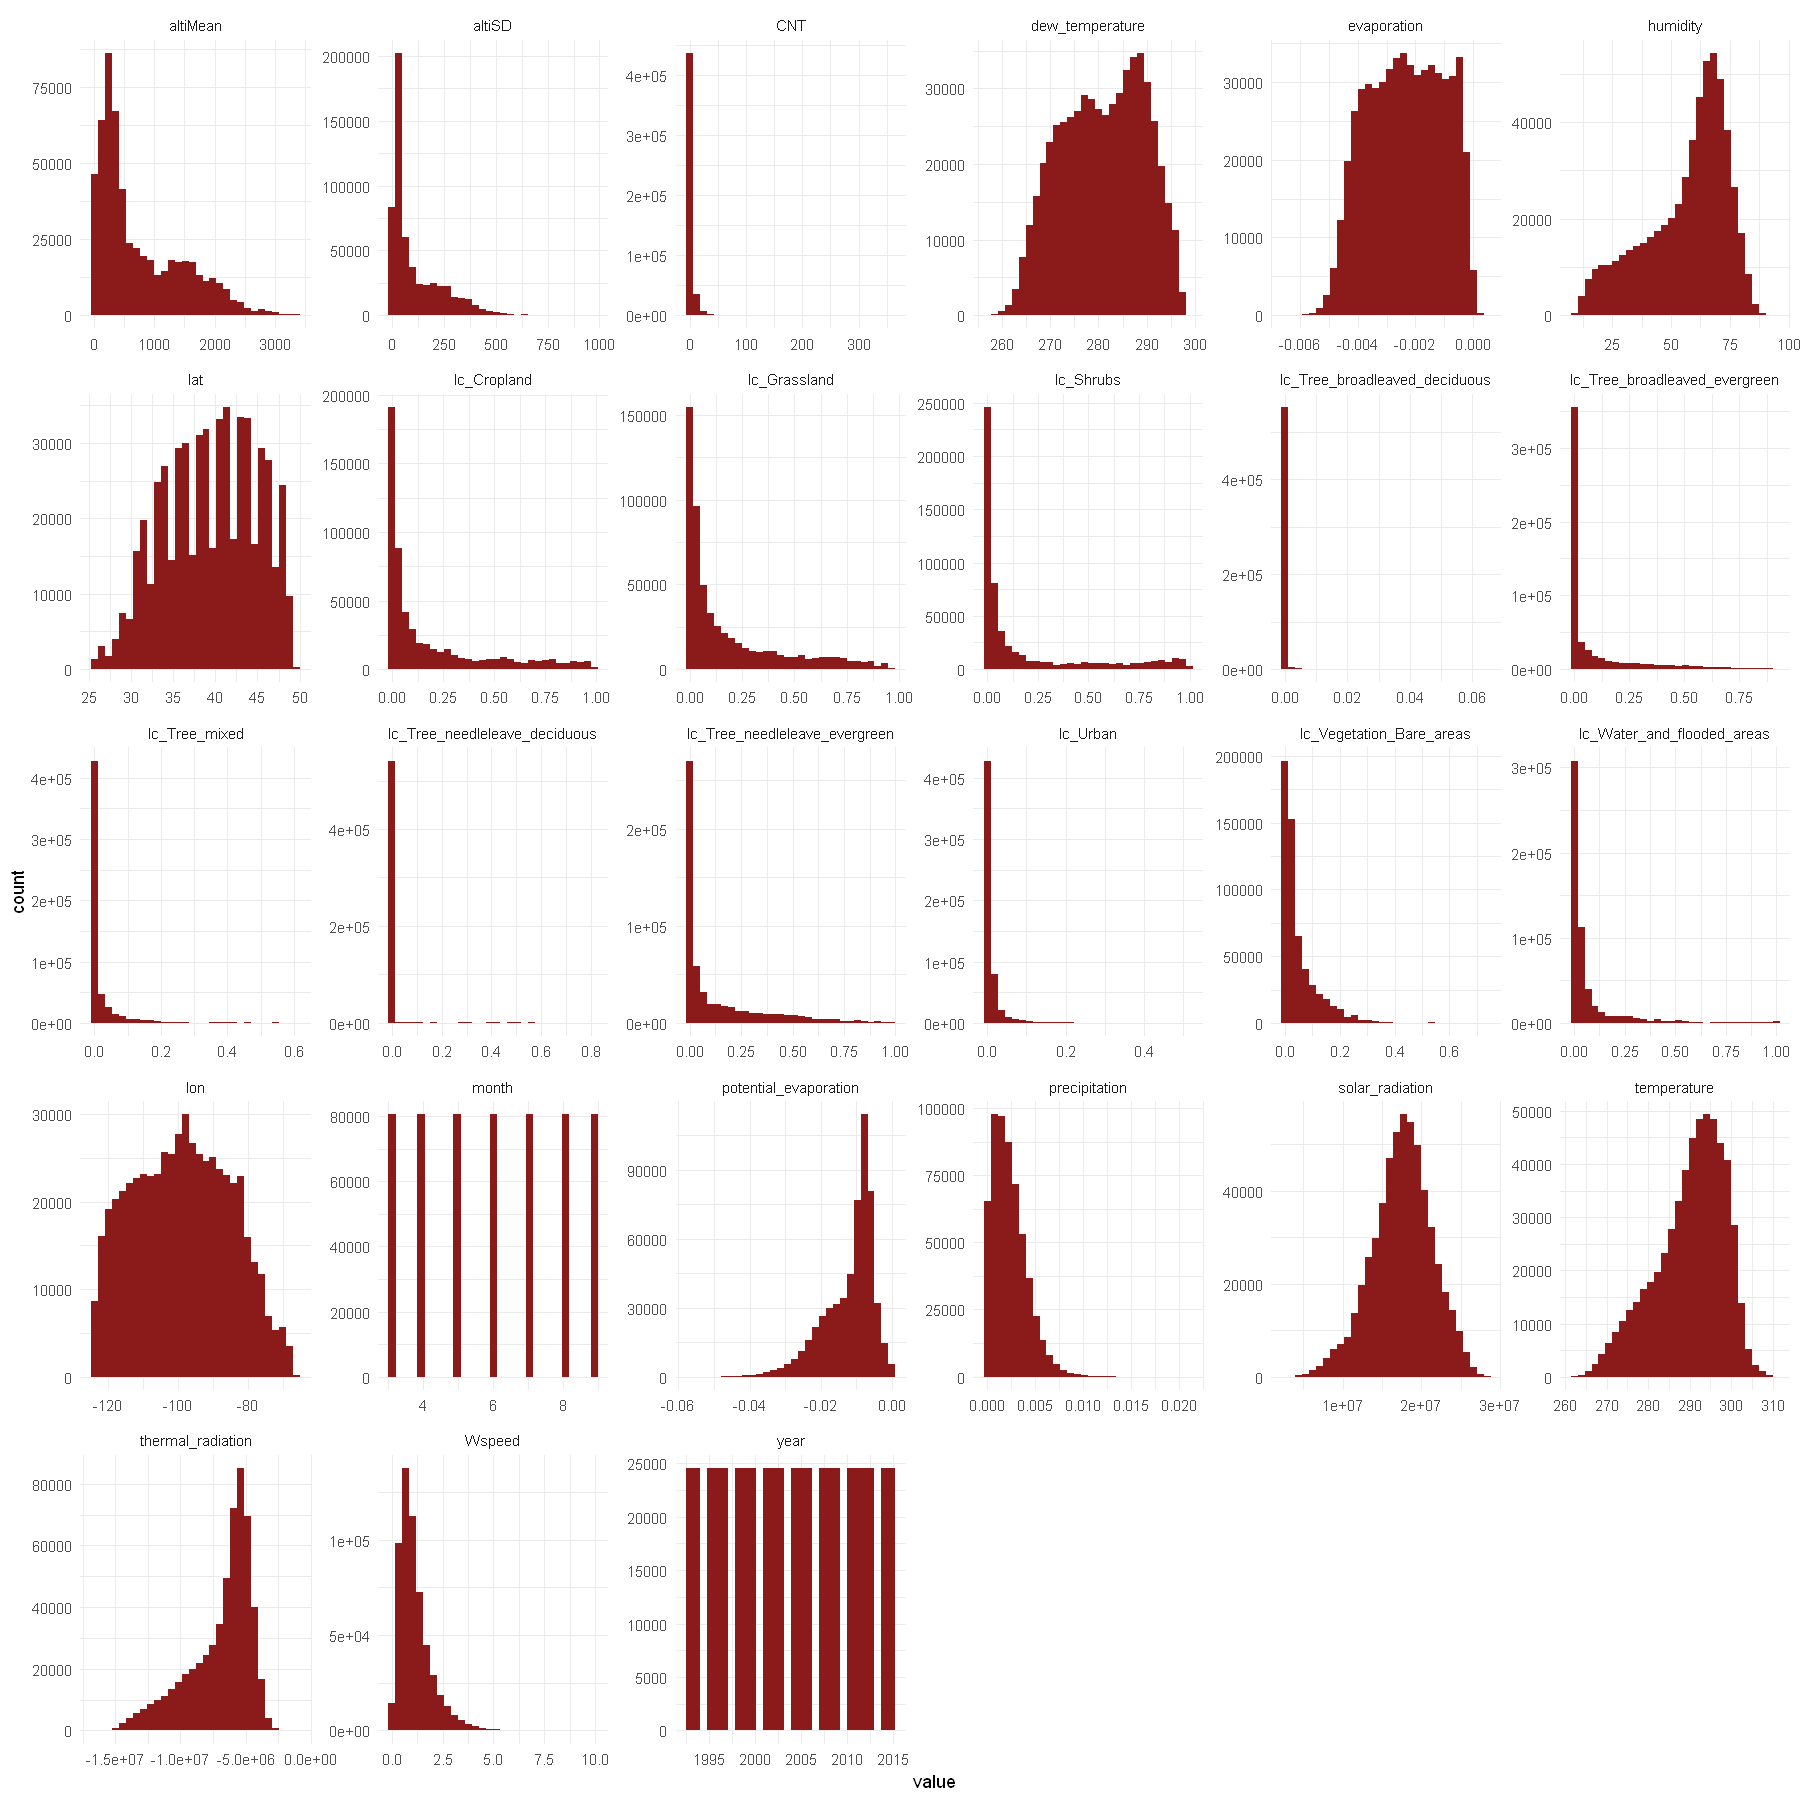

In [14]:
p <- data_train_DF_grouped %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram(fill="firebrick4") + 
    theme_minimal()
options(repr.plot.width=15, repr.plot.height=15)
p

Zero observations frequency

In [17]:
d1 <- data.frame(sum(na.omit(data_train_DF)$CNT == 0)/dim(na.omit(data_train_DF))[1], "CNT=0")
colnames(d1) <- c("frequency", "type")

d2 <- data.frame(sum(na.omit(data_train_DF)$CNT > 0)/dim(na.omit(data_train_DF))[1], "CNT>0")
colnames(d2) <- c("frequency", "type")

rbind(d1, d2)

frequency,type
0.6169494,CNT=0
0.3830506,CNT>0
